In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
company=pd.read_csv("Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [22]:
company.shape

(400, 12)

In [23]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
High           0
dtype: int64

In [24]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000,0.410000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113,0.492449
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000,0.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000,1.000000


# Converting from Categorical data

In [4]:
company['High'] = company.Sales.map(lambda x: 1 if x>8 else 0)
company['ShelveLoc']=company['ShelveLoc'].astype('category')
company['Urban']=company['Urban'].astype('category')
company['US']=company['US'].astype('category')
company.dtypes
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [5]:
#label encoding to convert categorical values into numeric
company['ShelveLoc']=company['ShelveLoc'].cat.codes
company['Urban']=company['Urban'].cat.codes
company['US']=company['US'].cat.codes
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0
399,9.71,134,37,0,27,120,1,49,16,1,1,1


# Setting feature and Target variables

In [6]:
feature_cols=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
x = company[feature_cols]
y = company.High
print(x)
print(y)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

# Splitting into Train and Test data

In [21]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=0)
x_train,x_test,y_train,y_test

(     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
 336        138      35            6          60    143          0   28   
 64         100      67           12         184    104          2   32   
 55         143      81            5          60    154          2   61   
 106        102      33            0         217    139          2   70   
 300        116      78            1         158     99          2   45   
 ..         ...     ...          ...         ...    ...        ...  ...   
 323        107     105           18         428    103          2   34   
 192        108      26            0         408     93          2   56   
 117        145      53            0         507    119          2   41   
 47         126      98            0         173    108          0   55   
 172        104     102           13         123    110          1   35   
 
      Education  Urban  US  
 336         18      1   0  
 64          16      0   1  
 55        

# Building Decision Tree

In [12]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) 
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) 
dcmodel = dcmodel.fit(x_train,y_train)
y_predict = dcmodel.predict(x_test)

In [13]:
#Accuracy
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  67.5


In [14]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[36  7]
 [19 18]]
              precision    recall  f1-score   support

           0       0.65      0.84      0.73        43
           1       0.72      0.49      0.58        37

    accuracy                           0.68        80
   macro avg       0.69      0.66      0.66        80
weighted avg       0.68      0.68      0.66        80



In [19]:
dcmodel = DecisionTreeClassifier(criterion='gini',
    max_depth=3)
dcmodel = dcmodel.fit(x_train , y_train)

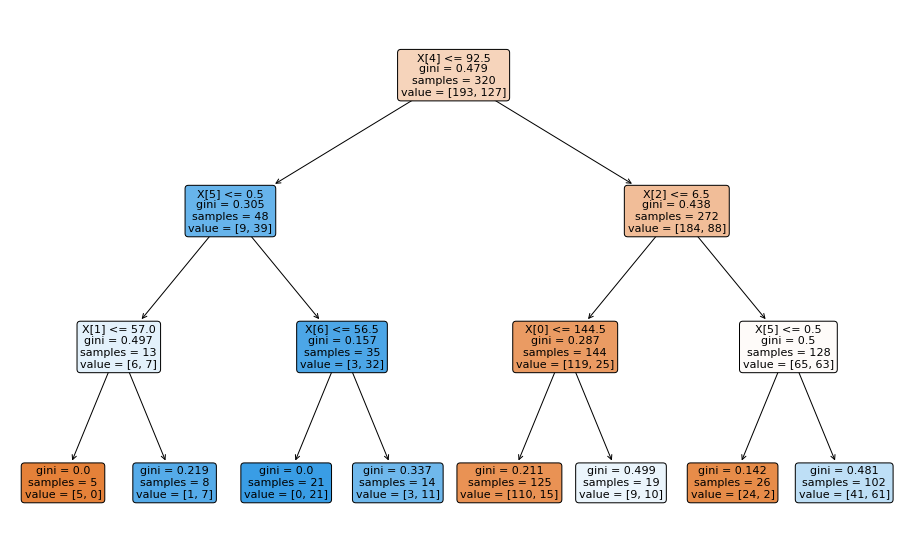

In [20]:
# Prepare a plot figure with set size.
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(dcmodel,rounded = True,filled = True)# Display the tree plot figure.
plt.show()